In [20]:
# Import used libraries
import keras
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, Lambda

In [22]:
# Load and display driving log
path = "/home/tiwi/Documents/mldata/data/"
file = "driving_log.csv"
driving_log = pd.read_csv(path + file)
driving_log

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [23]:
# Store all images as a numpy array
nb_images = len(driving_log)
images = []
for i in range(0, nb_images):
    img = cv2.imread(path_to_steering_data + driving_log['center'][i])
    images.append(img)
images = np.array(images)

Number of images: 3x8036 (center, left, right)


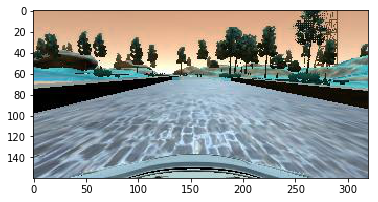

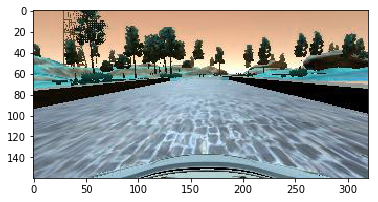

In [28]:
# Visualize random image
print("Number of images: 3x{} (center, left, right)".format(len(data)))

img = images[0,::]
plt.imshow(img)
plt.show()
plt.imshow(np.fliplr(img))
plt.show()

In [18]:
normalize = lambda x: (x / 255) - 0.5
image_shape = img.shape

model = Sequential()
model.add(Lambda(normalize(x), input_shape=image_shape))
x = 255
print(normalize(x))

TypeError: unsupported callable

 ## Questions
 * How to process left, right camera images?